# Machine Learning approaches: experiments, optimization, analysis

In [1]:
from functions_for_ML_experiments import cls_alg, visualize, count_metrics

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import json
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
CLS_ALGORITHM_list = ['LogisticRegression',
                      'PassiveAggressiveClassifier',
                      'RandomForestClassifier',
                      'DecisionTreeClassifier',
                     'GradientBoostingClassifier']
CLS_ALGORITHM_list = ['SVC']

In [5]:
train_df = pd.read_csv('../data/train_set.csv')
dev_df = pd.read_csv('../data/dev_set.csv')
test_df = pd.read_csv('../data/test_set.csv')

In [6]:
cols = list(train_df.columns)[5:-22]

In [7]:
with open('../data/special_cases.txt', 'r') as f:
    special_cases_dicts = json.load(f)
special_sessions = []
for sc in special_cases_dicts:
    special_sessions.extend(sc["ses"])
print(special_sessions)

['ses2028', 'ses1024', 'ses1032', 'ses1025', 'ses2012', 'ses2017', 'ses4007', 'ses3016', 'ses5008', 'ses2046', 'ses1055', 'ses4013', 'ses3018']


# Logistic Regression

-----LogisticRegression-----


/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/mount/studenten-temp1/users/matiasda/venv/lib64/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

best score ---  0.6535848032483128
best parameters ---  {'clf__C': 1.5, 'clf__class_weight': 'balanced', 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
-----------------------------------------
{'algorithm': 'LogisticRegression', 'precision': 0.5, 'recall': 0.62, 'f1_score': 0.55, 'f1_score_weighted': 0.65, 'accuracy': 0.64}
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      2041
           1       0.50      0.62      0.55      1146

    accuracy                           0.64      3187
   macro avg       0.63      0.64      0.63      3187
weighted avg       0.66      0.64      0.65      3187


  Visualization of classification


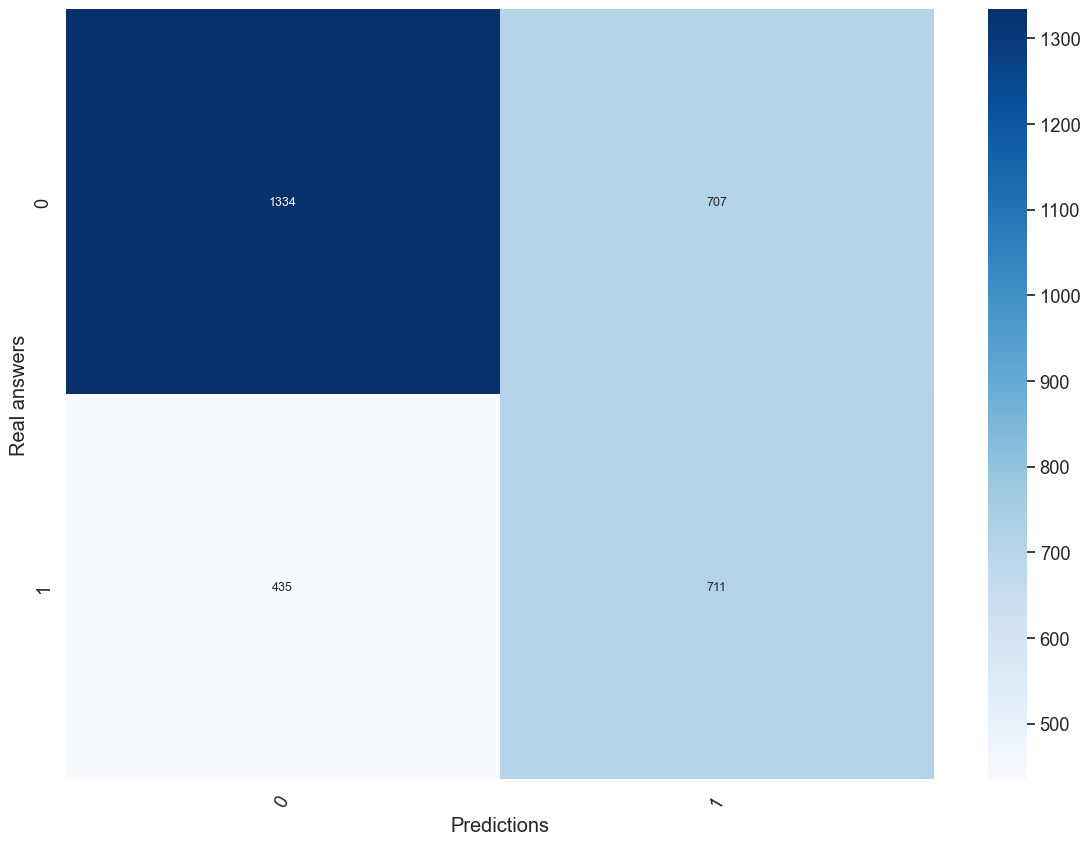

In [8]:
metrics_dict, model, y_test, predicted, pipeline = cls_alg('LogisticRegression',
                                                 train_df, 
                                                 dev_df,
                                                 list(train_df.columns)[5:-22],
                                                 'alc_x',
                                                 feature_extraction=True, 
                                                 path_to_save='../experiments')

### Test data: metrics, best parameters, interesting examples

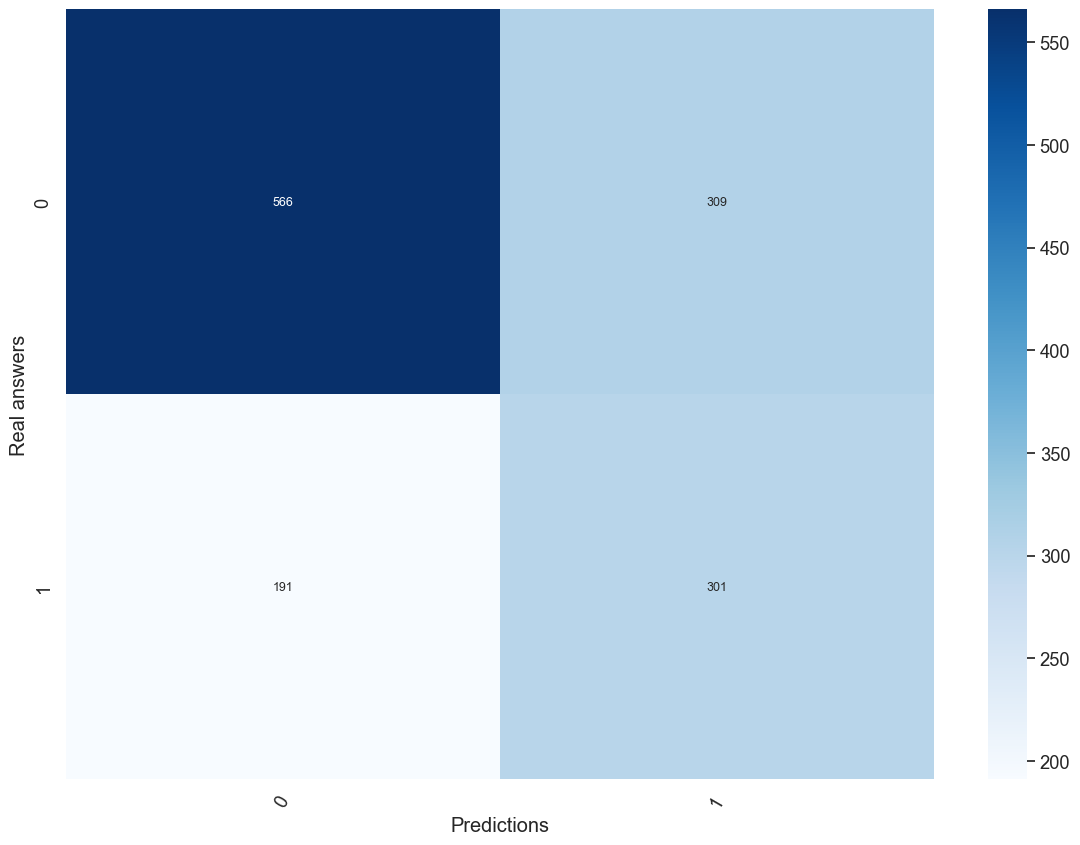

In [9]:
test_df['predicted'] = model.predict(test_df[cols])
visualize(y_true=test_df['alc_x'], 
          y_pred=test_df['predicted'], 
          df=test_df, 
          target='alc_x',
        algorithm='LogisticRegression', image_path='../experiments_test')

In [10]:
y_test = test_df['alc_x']
predicted = test_df['predicted']

pd.DataFrame(metrics_dict,  index=[0])

,algorithm,precision,recall,f1_score,f1_score_weighted,accuracy
0,LogisticRegression,0.5,0.62,0.55,0.65,0.64


In [11]:
pd.DataFrame(pipeline.best_params_.items())

,0,1
0,clf__C,1.5
1,clf__class_weight,balanced
2,clf__penalty,l1
3,clf__solver,liblinear


In [12]:
print('correctly predicted audiofiles - ',test_df[test_df['alc_x'] == test_df['predicted']].shape[0],
     '\nsessions with correctly predicted audiofiles - ', len(test_df[test_df['alc_x'] == test_df['predicted']]['session_x'].unique()),
     '\n\nuncorrectly predicted audiofiles - ',test_df[test_df['alc_x'] != test_df['predicted']].shape[0],
     '\nsessions with uncorrectly predicted audiofiles - ', len(test_df[test_df['alc_x'] != test_df['predicted']]['session_x'].unique()))
      

correctly predicted audiofiles -  867 
sessions with correctly predicted audiofiles -  292 

uncorrectly predicted audiofiles -  500 
sessions with uncorrectly predicted audiofiles -  230


In [13]:
test_df['correct_predictions'] = np.where((test_df['alc_x']==test_df['predicted']) , 1, 0)
test_df[['alc_x', 'predicted', 'correct_predictions']].sample(5)

,alc_x,predicted,correct_predictions
691,0,0,1
1118,0,1,0
164,0,0,1
479,1,1,1
414,0,1,0


In [14]:
test_df['correct_predictions'].value_counts()

correct_predictions
1    867
0    500
Name: count, dtype: int64

## Sex

<AxesSubplot: xlabel='correct_predictions'>

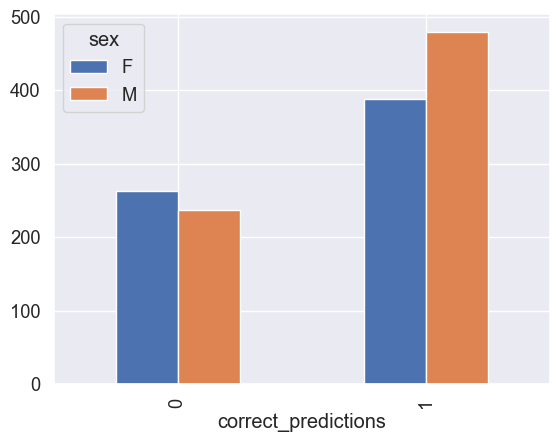

In [15]:
pd.crosstab(test_df['correct_predictions'],test_df['sex']).plot.bar()

In [16]:
test_df[test_df['alc_x'] != test_df['predicted']]['sex'].value_counts()

sex
F    263
M    237
Name: count, dtype: int64

In [17]:
test_df[['alc_x','predicted', 'sex']]['sex'].value_counts()

sex
M    716
F    651
Name: count, dtype: int64

In [18]:
test_df[test_df['alc_x'] != test_df['predicted']].columns

Index(['full_path', 'session_x', 'utterance', 'utt_x', 'alc_x',
       'F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       ...
       'ces', 'wea', 'irreg', 'anncom', 'specom', 'type', 'content', 'ss',
       'predicted', 'correct_predictions'],
      dtype='object', length=117)

## Type

<AxesSubplot: xlabel='correct_predictions'>

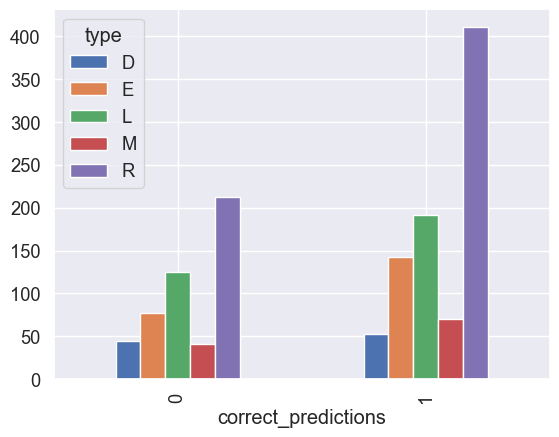

In [19]:
pd.crosstab(test_df['correct_predictions'],test_df['type']).plot.bar()

In [20]:
test_df[test_df['alc_x'] != test_df['predicted']]['type'].value_counts()

type
R    213
L    125
E     77
D     44
M     41
Name: count, dtype: int64

In [21]:
test_df[test_df['alc_x'] == test_df['predicted']]['type'].value_counts()

type
R    411
L    191
E    142
M     70
D     53
Name: count, dtype: int64

## Special cases

In [24]:
test_df[test_df['session_x'].isin(special_sessions)]['correct_predictions'].value_counts()

correct_predictions
1    30
0    22
Name: count, dtype: int64

In [34]:
special_cases_dicts

[{'category': 'specom',
  'comment': 'no_BAK_measurement',
  'ses': ['ses2028', 'ses1024', 'ses1032', 'ses1025', 'ses2012', 'ses2017']},
 {'category': 'specom',
  'comment': 'strange_velar_plosive',
  'ses': ['ses4007', 'ses3016']},
 {'category': 'specom',
  'comment': 'engine_failure_NA',
  'ses': ['ses5008', 'ses2046', 'ses1055']},
 {'category': 'specom',
  'comment': 'no_native_speaker',
  'ses': ['ses4013', 'ses3018']}]

In [36]:
test_df[(test_df['ss']==1) & (test_df['correct_predictions'] ==0)]['session_x'].value_counts()

session_x
ses2012    5
ses3018    3
ses2028    3
ses5008    3
ses2017    2
ses3016    1
ses4007    1
ses2046    1
ses1055    1
ses1032    1
ses1024    1
Name: count, dtype: int64

## Feature importance

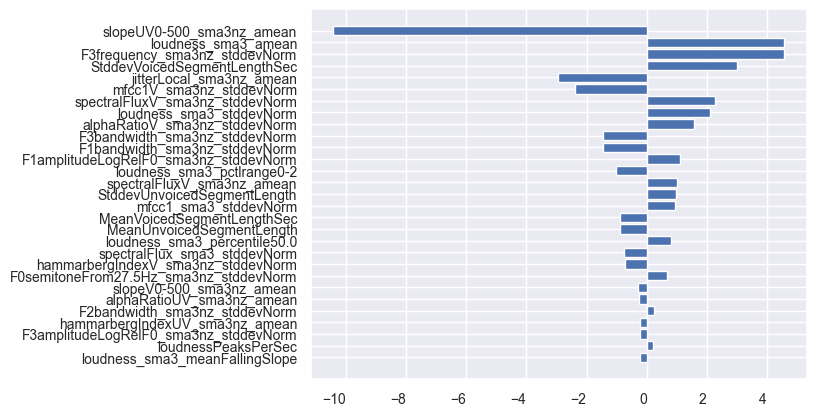

In [41]:
df_features = pd.DataFrame({'weights':model['clf'].coef_[0], 'feature_names': cols})
df_features['weights_abs'] = df_features['weights'].apply(lambda x: abs(x))
df_features = df_features.sort_values('weights_abs')
df_features = df_features[df_features['weights_abs'] > 0.2]
# plt.figure(figsize=(15,15))
plt.barh(df_features['feature_names'], df_features['weights'])
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
# pyplot.xticks(rotation=90, ha='right', fontsize=10)
plt.show()
# df_features.plot.bar(x='feature_names', y='weights', rot=90)
# df_features.plot()

In [43]:
print("Top-10 features: \n\n",  '\n'.join(list(df_features.sort_values('weights_abs')['feature_names'][:10])))

Top-10 features: 

 loudness_sma3_meanFallingSlope
loudnessPeaksPerSec
F3amplitudeLogRelF0_sma3nz_stddevNorm
hammarbergIndexUV_sma3nz_amean
F2bandwidth_sma3nz_stddevNorm
alphaRatioUV_sma3nz_amean
slopeV0-500_sma3nz_amean
F0semitoneFrom27.5Hz_sma3nz_stddevNorm
hammarbergIndexV_sma3nz_stddevNorm
spectralFlux_sma3_stddevNorm


# Passive Aggressive Classifier

-----PassiveAggressiveClassifier-----
best score ---  0.5019810222762071
best parameters ---  {'clf__class_weight': None, 'clf__loss': 'squared_hinge', 'clf__max_iter': 1500}
-----------------------------------------
{'algorithm': 'LogisticRegression', 'precision': 0.36, 'recall': 1.0, 'f1_score': 0.53, 'f1_score_weighted': 0.19, 'accuracy': 0.36}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2041
           1       0.36      1.00      0.53      1146

    accuracy                           0.36      3187
   macro avg       0.18      0.50      0.26      3187
weighted avg       0.13      0.36      0.19      3187


  Visualization of classification


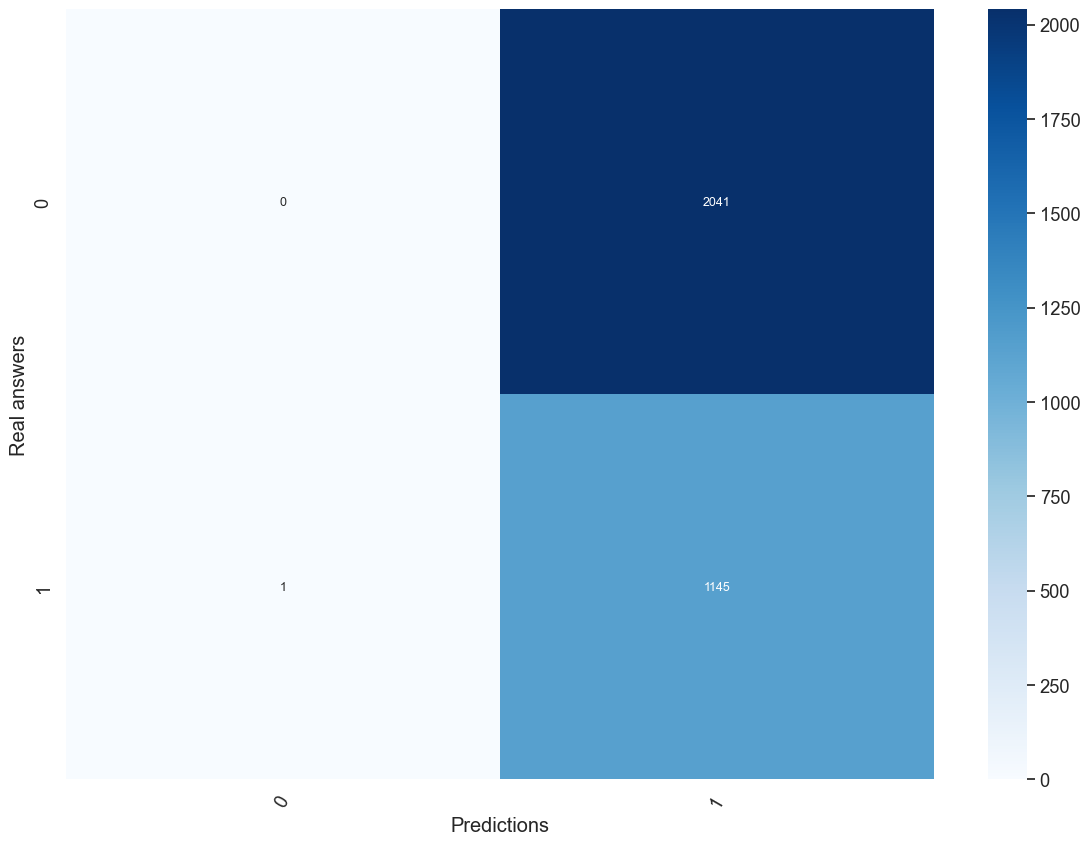

In [44]:
metrics_dict, model, y_test, predicted, pipeline = cls_alg('PassiveAggressiveClassifier',
                                                 train_df, 
                                                 dev_df,
                                                 list(train_df.columns)[5:-22],
                                                 'alc_x',
                                                 feature_extraction=True, 
                                                 path_to_save='../experiments')

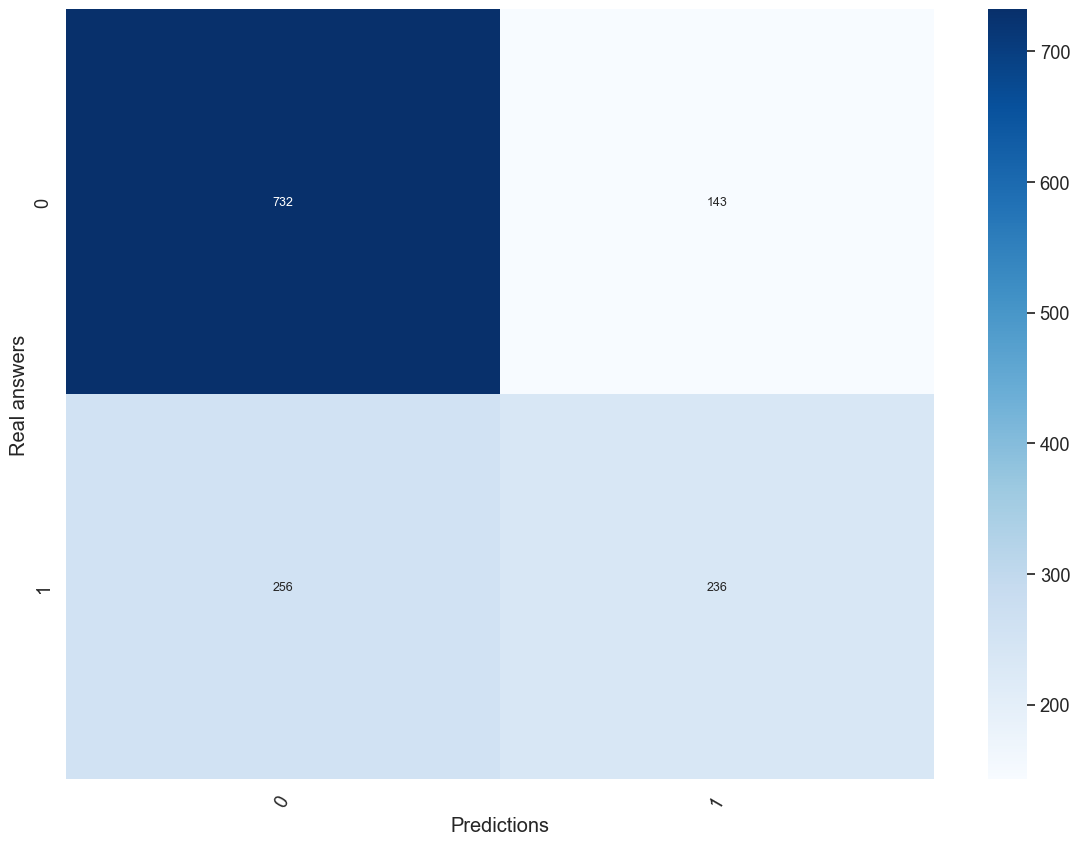

In [53]:
test_df['predicted'] = model.predict(test_df[cols])
visualize(y_true=test_df['alc_x'], 
          y_pred=test_df['predicted'], 
          df=test_df, 
          target='alc_x',
        algorithm='PassiveAggressiveClassifier', image_path='../experiments_test')

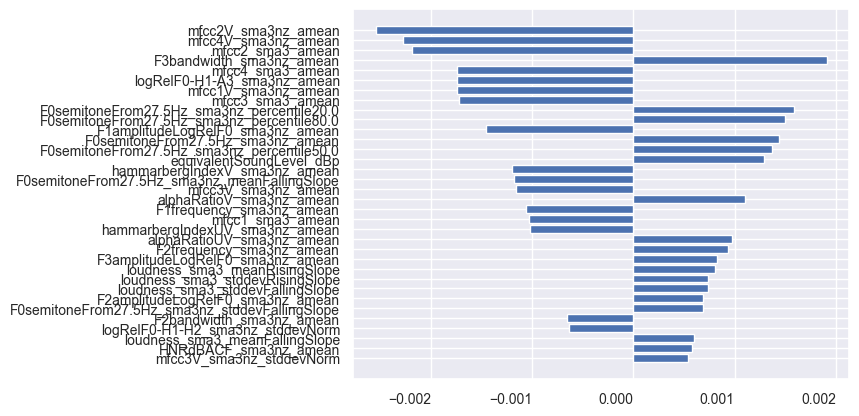

In [49]:
df_features = pd.DataFrame({'weights':model['clf'].coef_[0], 'feature_names': cols})
df_features['weights_abs'] = df_features['weights'].apply(lambda x: abs(x))
df_features = df_features.sort_values('weights_abs')
df_features = df_features[df_features['weights_abs'] > 0.0005]
plt.barh(df_features['feature_names'], df_features['weights'])
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.show()

# RandomForest

-----RandomForestClassifier-----
best score ---  0.7040407770777791
best parameters ---  {'clf__ccp_alpha': 0.001, 'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__n_estimators': 150}
-----------------------------------------
{'algorithm': 'LogisticRegression', 'precision': 0.64, 'recall': 0.49, 'f1_score': 0.56, 'f1_score_weighted': 0.71, 'accuracy': 0.72}
              precision    recall  f1-score   support

           0       0.75      0.85      0.79      2041
           1       0.64      0.49      0.56      1146

    accuracy                           0.72      3187
   macro avg       0.70      0.67      0.68      3187
weighted avg       0.71      0.72      0.71      3187


  Visualization of classification


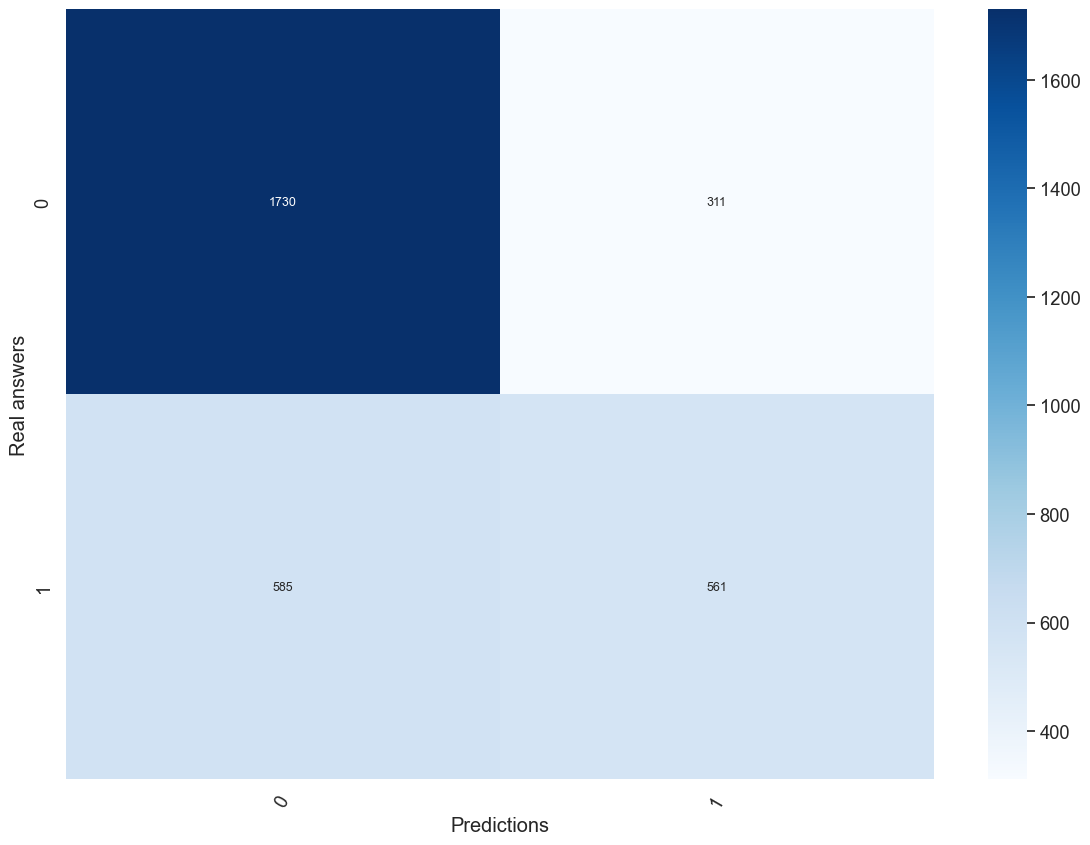

In [8]:
metrics_dict, model, y_test, predicted, pipeline = cls_alg('RandomForestClassifier',
                                                 train_df, 
                                                 dev_df,
                                                 list(train_df.columns)[5:-22],
                                                 'alc_x',
                                                 feature_extraction=True, 
                                                 path_to_save='../experiments')

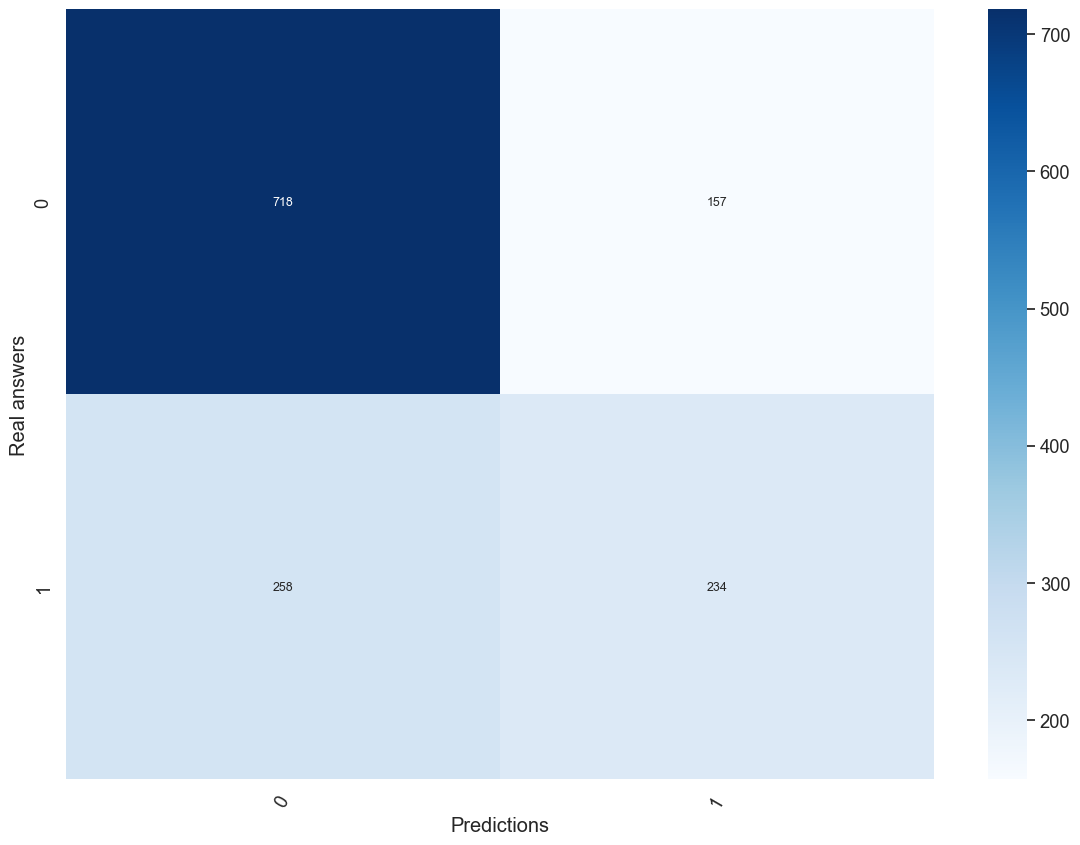

In [9]:
test_df['predicted'] = model.predict(test_df[cols])
visualize(y_true=test_df['alc_x'], 
          y_pred=test_df['predicted'], 
          df=test_df, 
          target='alc_x',
        algorithm='RandomForestClassifier', image_path='../experiments_test')

In [10]:
model['clf'].estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='sqrt', random_state=1455410708)

In [21]:
model['clf'].estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='sqrt', random_state=1455410708)

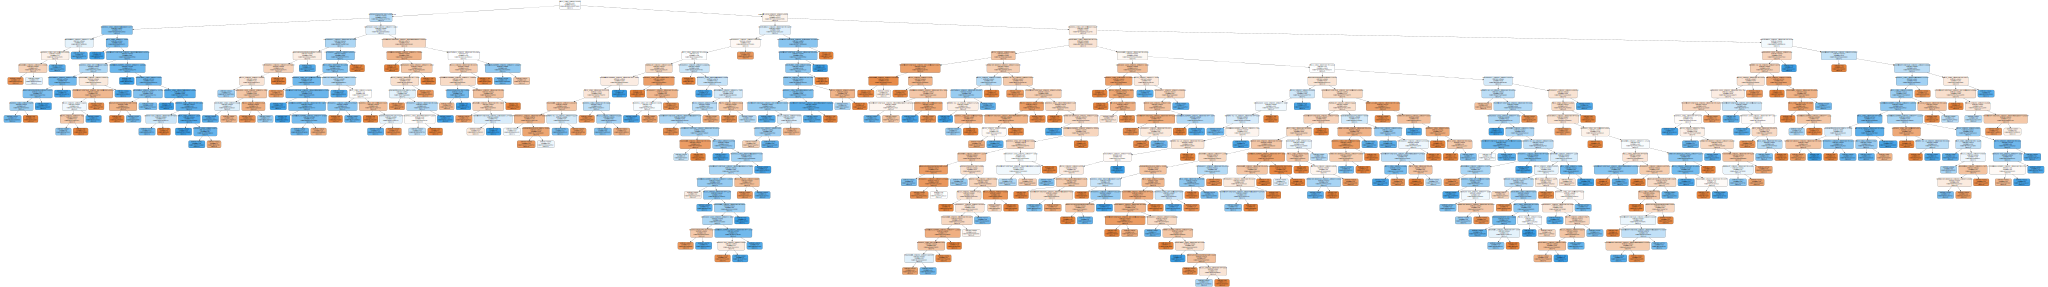

In [27]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rf.estimators_[0], 
                           feature_names=cols,
                           class_names=['0','1'], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

[Text(0.47900495556500716, 0.9821428571428571, 'loudness_sma3_amean <= 0.28\nentropy = 1.0\nsamples = 6686\nvalue = [5305.191, 5326.901]\nclass = 1'),
 Text(0.16519412793994748, 0.9464285714285714, 'mfcc4_sma3_amean <= -2.019\nentropy = 0.994\nsamples = 3370\nvalue = [2853.278, 2389.599]\nclass = 0'),
 Text(0.03151862464183381, 0.9107142857142857, 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope <= 20.364\nentropy = 0.974\nsamples = 404\nvalue = [270.96, 397.571]\nclass = 1'),
 Text(0.027698185291308502, 0.875, 'entropy = 0.615\nsamples = 36\nvalue = [11.713, 65.335]\nclass = 1'),
 Text(0.03533906399235912, 0.875, 'mfcc4V_sma3nz_amean <= -25.486\nentropy = 0.989\nsamples = 368\nvalue = [259.247, 332.236]\nclass = 1'),
 Text(0.03151862464183381, 0.8392857142857143, 'entropy = 0.0\nsamples = 7\nvalue = [0.0, 13.901]\nclass = 1'),
 Text(0.039159503342884434, 0.8392857142857143, 'F1frequency_sma3nz_amean <= 646.673\nentropy = 0.992\nsamples = 361\nvalue = [259.247, 318.335]\nclass = 1'),
 T

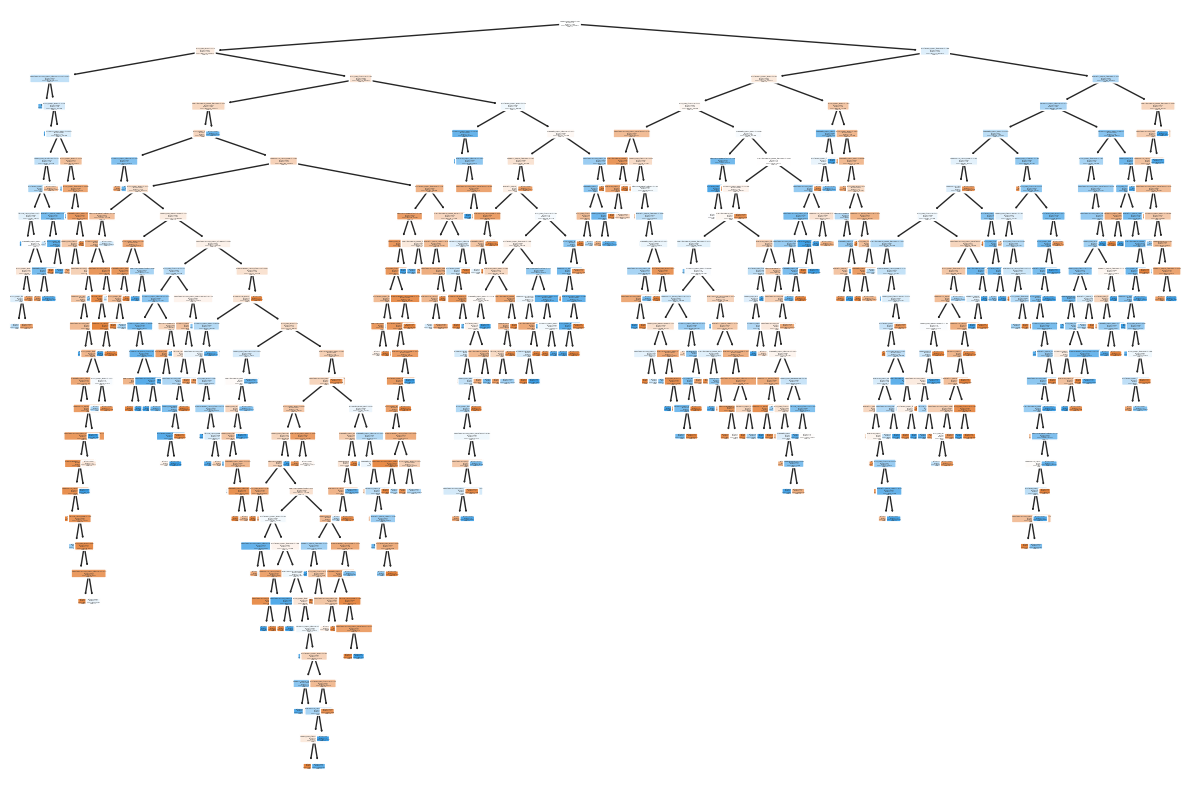

In [28]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(model['clf'].estimators_[0], 
          feature_names=cols,
          class_names=['0','1'], 
          filled=True, impurity=True, 
          rounded=True)

In [29]:
fig.savefig('../experiments/images/RandomForestClassifier.png')

In [31]:
importances = model['clf'].feature_importances_
std = np.std([tree.feature_importances_ for tree in model['clf'].estimators_], axis=0)
std

array([0.00567025, 0.00532635, 0.00609307, 0.00609395, 0.00773911,
       0.00516837, 0.00454204, 0.00565191, 0.00501767, 0.0049988 ,
       0.00600246, 0.00518758, 0.00577157, 0.00506188, 0.0051946 ,
       0.00504635, 0.00601603, 0.00537287, 0.00512922, 0.00655582,
       0.00559524, 0.00912538, 0.00576042, 0.006061  , 0.00997825,
       0.00975095, 0.0059335 , 0.00695885, 0.00829249, 0.00598243,
       0.00616252, 0.00500792, 0.00560028, 0.00529768, 0.00504686,
       0.0060209 , 0.00523518, 0.0044594 , 0.00697304, 0.00557552,
       0.00671708, 0.00610803, 0.00534642, 0.00552271, 0.00526738,
       0.00454654, 0.00589563, 0.00533289, 0.00485733, 0.00595853,
       0.0044067 , 0.00500411, 0.00622235, 0.0064217 , 0.00735365,
       0.00521359, 0.00472502, 0.0055646 , 0.00753368, 0.00645509,
       0.00777845, 0.00610563, 0.00615135, 0.00603432, 0.00667992,
       0.00534927, 0.00570711, 0.01510044, 0.0081312 , 0.00638258,
       0.00655021, 0.00657741, 0.00578691, 0.0051701 , 0.00623

In [1]:
#top-20 features only training

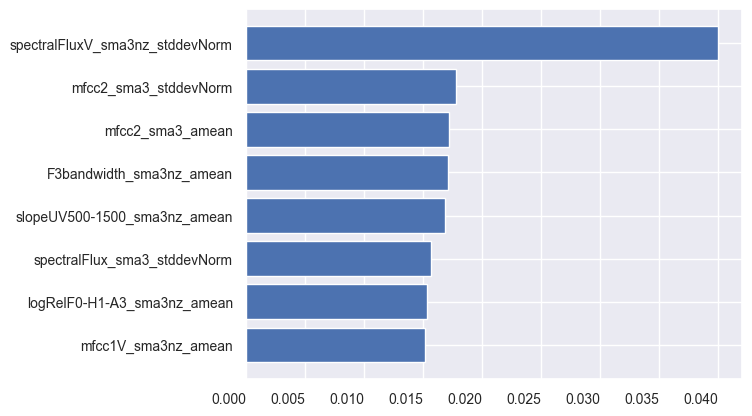

In [38]:
df_features = pd.DataFrame({'weights':model['clf'].feature_importances_,
                            'feature_names': cols})
df_features['weights_abs'] = df_features['weights'].apply(lambda x: abs(x))
df_features = df_features.sort_values('weights_abs')
df_features = df_features[df_features['weights_abs'] > 0.015]
plt.barh(df_features['feature_names'], df_features['weights'])
plt.xticks(ha='right', fontsize=10)
plt.yticks(ha='right', fontsize=10)
plt.show()

In [39]:
print("Top-10 features: \n\n",  '\n'.join(list(df_features.sort_values('weights_abs')['feature_names'][:10])))

Top-10 features: 

 mfcc1V_sma3nz_amean
logRelF0-H1-A3_sma3nz_amean
spectralFlux_sma3_stddevNorm
slopeUV500-1500_sma3nz_amean
F3bandwidth_sma3nz_amean
mfcc2_sma3_amean
mfcc2_sma3_stddevNorm
spectralFluxV_sma3nz_stddevNorm


# Decision Tree

-----DecisionTreeClassifier-----
best score ---  0.6276322077320028
best parameters ---  {'clf__ccp_alpha': 0.001, 'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__min_impurity_decrease': 0.0, 'clf__splitter': 'best'}
-----------------------------------------
{'algorithm': 'LogisticRegression', 'precision': 0.57, 'recall': 0.31, 'f1_score': 0.4, 'f1_score_weighted': 0.64, 'accuracy': 0.67}
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      2041
           1       0.57      0.31      0.40      1146

    accuracy                           0.67      3187
   macro avg       0.63      0.59      0.58      3187
weighted avg       0.65      0.67      0.64      3187


  Visualization of classification


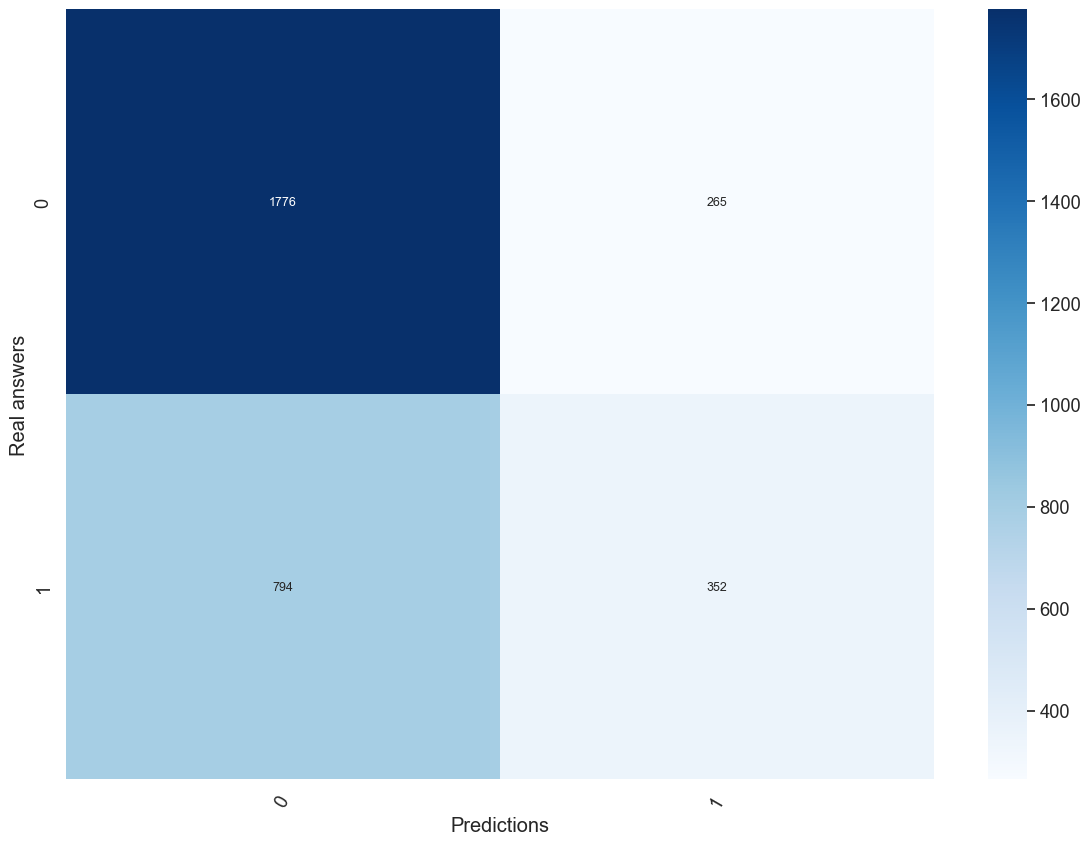

In [40]:
metrics_dict, model, y_test, predicted, pipeline = cls_alg('DecisionTreeClassifier',
                                                 train_df, 
                                                 dev_df,
                                                 list(train_df.columns)[5:-22],
                                                 'alc_x',
                                                 feature_extraction=True, 
                                                 path_to_save='../experiments')

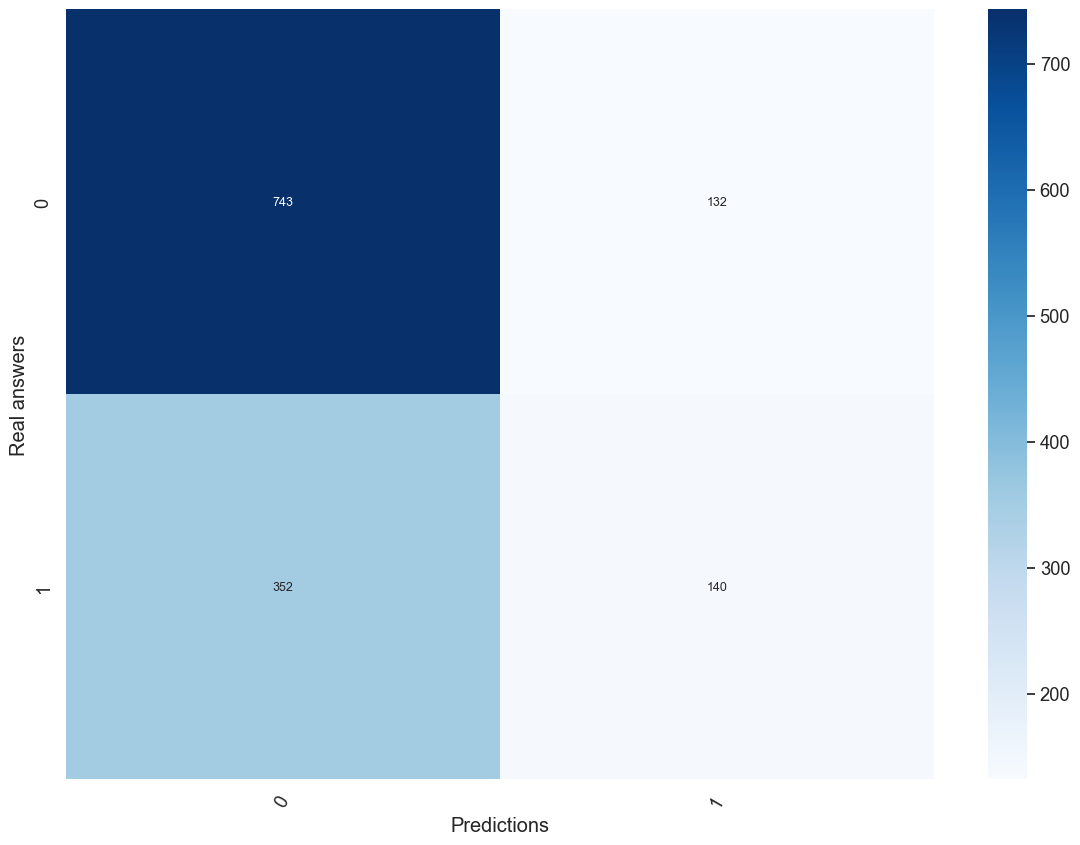

In [41]:
test_df['predicted'] = model.predict(test_df[cols])
visualize(y_true=test_df['alc_x'], 
          y_pred=test_df['predicted'], 
          df=test_df, 
          target='alc_x',
        algorithm='DecisionTreeClassifier', image_path='../experiments_test')

In [46]:
count_metrics(test_df['alc_x'], test_df['predicted'])

{'algorithm': 'LogisticRegression',
 'precision': 0.51,
 'recall': 0.28,
 'f1_score': 0.37,
 'f1_score_weighted': 0.61,
 'accuracy': 0.65}